## OPC PDG

# Integrantes: Sandra Niño y Johnatan Garzón

En el presente jupyter notebook se hará uso de LDA (Latent Dirichlet Allocation) para que las respuestas a la pregunta "Para ti,¿Que sí es paz?", en este caso entendidos como documentos, formen topics o categorías de palabras relacionadas  a la pregunta.

In [1]:
%matplotlib inline
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression # modelos lineales
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score #protocolo de evaluación
from sklearn import datasets, metrics
from sklearn import preprocessing
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\sami_\Anaconda3\lib\site-packages\past\types\oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [2]:
dfEncuestaSPCC=pd.read_excel('./data/encuesta_SPCC-25ABR2018-MODIFICADA-ORTOGRAFIA.xlsx')

In [3]:
dfPazUSC=pd.read_excel('./data/marco_PAZ_USC_09ABR2019_latest_version_False_2019-MAY-09_0936-MODIFICADA-ORTOGRAFIA.xlsx')

In [4]:
dfNarrativasMayo=pd.read_excel('./data/respaldo_actualizacion_NARRATIVAS-10MAY2019-0600-MODIFICADA-ORTOGRAFIA.xlsx')

# Exploración y preparación de datos

## DfEncuestaSPCC

In [5]:
dfEncuestaSPCC.head()

,¿Cuál es el sistema operativo de su dispositivo móvil?,Nombre/s:,Apellido/s:,Sexo,Edad,¿Nació en Cali?,¿En qué departamento nació?,¿En qué municipio nació?,"De acuerdo con su cultura, pueblo o rasgos físicos usted es o se reconoce como:",¿Cuántas personas componen su hogar?,...,Seleccione las tres palabras/conceptos/expresiones más PODEROSAS para definir Paz/Alimentación,Seleccione las tres palabras/conceptos/expresiones más PODEROSAS para definir Paz/Derecho a la vivienda digna,"Seleccione las tres palabras/conceptos/expresiones más PODEROSAS para definir Paz/No acoso (sexual, laboral)",Seleccione las tres palabras/conceptos/expresiones más PODEROSAS para definir Paz/Primera infancia,Escriba una frase corta en la que exprese su significado de la Paz:,Escriba un deseo de Paz para los demás:,Sugerencias específicas para medir ¿qué si es Paz?:,Sugerencias específicas para mejorar las capacidades de la SPCC:,Sugerencias específicas al OPC para una futura encuesta:,_index
0,Android,Gregorry,Rivera Garibello,Hombre,25,Si,NaN,NaN,Ninguno de los anteriores,4,...,0,0,0,0,"La humanización del espacio, ese siempre será ...","La búsqueda sigue su curso, un gran camino ocu...",Vamos bien!!!,"Más apoyo entre equipos, para mejorar la comun...",Que sea más corta,1
1,Android,Mauricio,Sedano,Hombre,43,No,Santander,Barrancabermeja,"Negro(a), mulato(a) y afrocolombiano(a)",2,...,0,0,0,0,Mantener las familias unidas,"Identificar lo que sí es paz, y emitir recomen...","diseñar inclusión y representatividad, procesa...",Dar cursos cortos online y certificados como E...,No combinar sectores con tipos de experiencias...,2
2,Android,Andrés Felipe,Suárez Sánchez,Hombre,31,Si,NaN,NaN,Ninguno de los anteriores,2,...,0,0,0,0,La paz es satisfacer los derechos básicos cons...,Trabajemos junto en asegurar los derechos bási...,Incluir una muestra de todos los grupos social...,Promover la auto formación virtual para ser es...,Planear un poco mejor el proceso de realizació...,3
3,Android,Ana María,Gálvez Yepes,Mujer,27,Si,NaN,NaN,Ninguno de los anteriores,4,...,0,0,0,0,La paz es el bien común,"Deseo que tus días estén llenos de fuerza, fel...",Tener en cuenta la voz de las comunidades,Crear una herramieta de impacto que permita po...,Sintetizar la introducción,4
4,iOS (Iphone),Ana Cristina,Alzate Restrepo,Mujer,39,No,Antioquia,Medellín,Ninguno de los anteriores,1,...,0,0,0,0,Concertación,Tolerancia con el otro en todo momento y lugar,Conocer por medio de casos puntuales el nivel ...,Formación en proyectos sociales: formulacion y...,Medir temas de clima organizacional como una a...,5


In [6]:
dfEncuestaSPCC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Columns: 221 entries, ¿Cuál es el sistema operativo de su dispositivo móvil? to _index
dtypes: float64(64), int64(58), object(99)
memory usage: 221.1+ KB


In [7]:
cols = dfEncuestaSPCC.columns.tolist()
cols

['¿Cuál es el sistema operativo de su dispositivo móvil?',
 'Nombre/s:',
 'Apellido/s:',
 'Sexo',
 'Edad',
 '¿Nació en Cali?',
 '¿En qué departamento nació?',
 '¿En qué municipio nació?',
 'De acuerdo con su cultura, pueblo o rasgos físicos usted es o se reconoce como:',
 '¿Cuántas personas componen su hogar?',
 'Actualmente las condiciones de vida en su hogar son:',
 'En relación al hogar donde se crió en su primera infancia, su hogar actual vive económicamente:',
 'Usted piensa que el nivel de vida actual de su hogar, respecto al que tenía 5 años atrás, es:',
 'Selecciona, según la estructura del organismo de la que haces parte:',
 'Seleccione el proyecto para el cual trabaja',
 'Especifique',
 '¿Cuál es su principal función en el proyecto?',
 '¿Cuál es el problema central que trata de resolver su proyecto?',
 '¿Qué metodología/s de trabajo destacaría/s del proyecto?, ¿por qué?',
 'Indique cinco (5x) palabras claves para su proyecto',
 'Advierta cinco (5x) palabras claves que NO son 

Como podemos apreciar esta encuesta fue demasiado extensa. Las columnas que nos interesan son:  'Mencione tres (3x) “Indicadores de CONSTRUCCIÓN DE PAZ”', 'Seleccione las tres palabras/conceptos/expresiones más PODEROSAS para definir Paz' y  'Escriba una frase corta en la que exprese su significado de la Paz:'

In [8]:
dfEncuestaSPCC.columns.get_loc('Mencione tres (3x) “Indicadores de CONSTRUCCIÓN DE PAZ”')

23

In [9]:
dfEncuestaSPCC.drop(dfEncuestaSPCC.iloc[:, 0:23], inplace = True, axis = 1) 

In [10]:
cols = dfEncuestaSPCC.columns.tolist()
cols

['Mencione tres (3x) “Indicadores de CONSTRUCCIÓN DE PAZ”',
 'Mencione tres (3x) palabras claves para la RECONCILIACIÓN',
 '¿Cuál es tu lugar de residencia?:',
 'Comuna:',
 'Barrio:',
 'Corregimiento:',
 'Vereda:',
 'Otros nombres utilizados para referirse a tu Barrio / Vereda / Zona / Sector:',
 'Departamento:',
 'Municipio:',
 'Tiempo de residencia:',
 '¿Qué tan satisfecho se siente de vivir en ese barrio o corregimiento?',
 'Durante los ÚLTIMOS DOCE MESES, ¿de cuáles de los siguientes hechos ha sido víctima usted o algún miembro del hogar dentro de su barrio o vereda?',
 'Durante los ÚLTIMOS DOCE MESES, ¿de cuáles de los siguientes hechos ha sido víctima usted o algún miembro del hogar dentro de su barrio o vereda?/Atracos o robos',
 'Durante los ÚLTIMOS DOCE MESES, ¿de cuáles de los siguientes hechos ha sido víctima usted o algún miembro del hogar dentro de su barrio o vereda?/Homicidios o asesinatos',
 'Durante los ÚLTIMOS DOCE MESES, ¿de cuáles de los siguientes hechos ha sido ví

In [11]:
dfEncuestaSPCC.columns.get_loc("Seleccione las tres palabras/conceptos/expresiones más PODEROSAS para definir Paz")

166

In [12]:
dfEncuestaSPCC.drop(dfEncuestaSPCC.iloc[:, 1:166], inplace = True, axis = 1) 

In [13]:
cols = dfEncuestaSPCC.columns.tolist()
cols

['Mencione tres (3x) “Indicadores de CONSTRUCCIÓN DE PAZ”',
 'Seleccione las tres palabras/conceptos/expresiones más PODEROSAS para definir Paz',
 'Seleccione las tres palabras/conceptos/expresiones más PODEROSAS para definir Paz/Respeto',
 'Seleccione las tres palabras/conceptos/expresiones más PODEROSAS para definir Paz/Tolerancia',
 'Seleccione las tres palabras/conceptos/expresiones más PODEROSAS para definir Paz/Armonía',
 'Seleccione las tres palabras/conceptos/expresiones más PODEROSAS para definir Paz/Hogar',
 'Seleccione las tres palabras/conceptos/expresiones más PODEROSAS para definir Paz/Entorno protector',
 'Seleccione las tres palabras/conceptos/expresiones más PODEROSAS para definir Paz/No discriminación',
 'Seleccione las tres palabras/conceptos/expresiones más PODEROSAS para definir Paz/Amor',
 'Seleccione las tres palabras/conceptos/expresiones más PODEROSAS para definir Paz/Compartir',
 'Seleccione las tres palabras/conceptos/expresiones más PODEROSAS para definir Pa

In [14]:
dfEncuestaSPCC.columns.get_loc("Escriba una frase corta en la que exprese su significado de la Paz:")

27

In [15]:
dfEncuestaSPCC.drop(dfEncuestaSPCC.iloc[:, 2:27], inplace = True, axis = 1) 

In [16]:
cols = dfEncuestaSPCC.columns.tolist()
cols

['Mencione tres (3x) “Indicadores de CONSTRUCCIÓN DE PAZ”',
 'Seleccione las tres palabras/conceptos/expresiones más PODEROSAS para definir Paz',
 'Escriba una frase corta en la que exprese su significado de la Paz:',
 'Escriba un deseo de Paz para los demás:',
 'Sugerencias específicas para medir ¿qué si es Paz?:',
 'Sugerencias específicas para mejorar las capacidades de la SPCC:',
 'Sugerencias específicas al OPC para una futura encuesta:',
 '_index']

In [17]:
dfEncuestaSPCC.drop(dfEncuestaSPCC.iloc[:, 3:8], inplace = True, axis = 1) 

In [18]:
cols = dfEncuestaSPCC.columns.tolist()
cols

['Mencione tres (3x) “Indicadores de CONSTRUCCIÓN DE PAZ”',
 'Seleccione las tres palabras/conceptos/expresiones más PODEROSAS para definir Paz',
 'Escriba una frase corta en la que exprese su significado de la Paz:']

## dfPazUSC

In [19]:
dfPazUSC.head()

,start,end,today,username,simserial,subscriberid,deviceid,phonenumber,equipo,punto_captura,...,municipio,cargo,facultad,programa_academico,__version__,_id,_uuid,_submission_time,_validation_status,_index
0,2019-04-09T10:45:13.267-05,2019-04-09T11:10:35.529-05,2019-04-09,datospazcali,89571015019090214468,732101527021446,351712103831066,NaN,equipo_6,bloque_5,...,NaN,funcionario_operativo,NaN,NaN,vTnXvdYjdSdY5wARMg2L5Q,25553871,11f1cd0d-ba51-4a6f-afcd-95b2e120158c,2019-04-09T17:37:52,NaN,1
1,2019-04-09T11:14:49.149-05,2019-04-09T11:29:32.972-05,2019-04-09,datospazcali,8957123401818574217,732123630899421,358126076228817,NaN,equipo_6,bloque_5,...,NaN,estudiante,NaN,NaN,vTnXvdYjdSdY5wARMg2L5Q,25553956,c8477283-ae3e-45e8-9e9f-9d65b0222aac,2019-04-09T17:38:35,NaN,2
2,2019-04-09T11:30:09.295-05,2019-04-09T11:32:31.353-05,2019-04-09,datospazcali,8957123401818574217,732123630899421,358126076228817,NaN,equipo_6,bloque_5,...,NaN,estudiante,salud,medicina,vTnXvdYjdSdY5wARMg2L5Q,25553957,d3608c8b-5dd3-46fe-851c-af07d3eb53e2,2019-04-09T17:38:36,NaN,3
3,2019-04-09T10:23:40.386-05,2019-04-09T10:34:34.074-05,2019-04-09,datospazcali,89571015021013409001,732101543311682,353779105621165,NaN,tecnico_OPC,entrada_KL_5ta,...,76306.0,estudiante,derecho,derecho,vTnXvdYjdSdY5wARMg2L5Q,25546856,29d3b696-4f20-4df5-b5ea-5c922a589d43,2019-04-09T15:35:10,NaN,4
4,2019-04-09T10:21:54.412-05,2019-04-09T10:34:35.893-05,2019-04-09,datospazcali,89571015017080727838,732101502072783,355656080709710,NaN,tecnico_OPC,entrada_KL_5ta,...,NaN,estudiante,derecho,derecho,vTnXvdYjdSdY5wARMg2L5Q,25546861,9519762f-e31c-4842-a2cb-abee7d6ecfaf,2019-04-09T15:35:13,NaN,5


In [20]:
cols = dfPazUSC.columns.tolist()
cols

['start',
 'end',
 'today',
 'username',
 'simserial',
 'subscriberid',
 'deviceid',
 'phonenumber',
 'equipo',
 'punto_captura',
 'narrativa_paz',
 'componentes',
 'componentes/tranquilidad',
 'componentes/familia_hogar',
 'componentes/vecinos_amigos',
 'componentes/convivencia',
 'componentes/narutaleza',
 'componentes/no_violencia',
 'componentes/zonas_verdes',
 'componentes/démas_personas',
 'componentes/respeto',
 'componentes/comunidad',
 'componentes/espiritualidad',
 'componentes/no_discriminación',
 'componentes/amor',
 'componentes/tradiciones_familiares',
 'componentes/libertad',
 'componentes/derechos_sociales',
 'componentes/salud',
 'componentes/educación',
 'componentes/derechos_espacio_publico',
 'componentes/perdón',
 'componentes/empleo',
 'componentes/reconocimiento',
 'componentes/reconciliación',
 'sexo',
 'edad',
 'departamento_nacimiento',
 'municipio_nacimiento',
 'zona_residencia',
 'comuna',
 'barrio',
 'corregimiento',
 'vereda',
 'otro_sector',
 'departament

La unica columna que nos interesa es: 'narrativa_paz'

In [21]:
dfPazUSC.columns.get_loc("narrativa_paz")

10

In [22]:
dfPazUSC.drop(dfPazUSC.iloc[:, 0:10], inplace = True, axis = 1) 

In [23]:
cols = dfPazUSC.columns.tolist()
cols

['narrativa_paz',
 'componentes',
 'componentes/tranquilidad',
 'componentes/familia_hogar',
 'componentes/vecinos_amigos',
 'componentes/convivencia',
 'componentes/narutaleza',
 'componentes/no_violencia',
 'componentes/zonas_verdes',
 'componentes/démas_personas',
 'componentes/respeto',
 'componentes/comunidad',
 'componentes/espiritualidad',
 'componentes/no_discriminación',
 'componentes/amor',
 'componentes/tradiciones_familiares',
 'componentes/libertad',
 'componentes/derechos_sociales',
 'componentes/salud',
 'componentes/educación',
 'componentes/derechos_espacio_publico',
 'componentes/perdón',
 'componentes/empleo',
 'componentes/reconocimiento',
 'componentes/reconciliación',
 'sexo',
 'edad',
 'departamento_nacimiento',
 'municipio_nacimiento',
 'zona_residencia',
 'comuna',
 'barrio',
 'corregimiento',
 'vereda',
 'otro_sector',
 'departamento',
 'municipio',
 'cargo',
 'facultad',
 'programa_academico',
 '__version__',
 '_id',
 '_uuid',
 '_submission_time',
 '_validati

In [24]:
len(cols)

46

In [25]:
dfPazUSC.drop(dfPazUSC.iloc[:, 1:47], inplace = True, axis = 1) 

In [26]:
cols = dfPazUSC.columns.tolist()
cols

['narrativa_paz']

## dfNarrativasMayo

In [27]:
dfNarrativasMayo.head()

,_orden,pre_INDEX entrada_KOBO,_grupo,index_MA salida_KOBO,caso
0,1,1,n15FEB2017,299.0,sin_INDEX
1,2,2,n15FEB2017,33.0,sin_INDEX
2,3,3,n15FEB2017,375.0,con_INDEX
3,4,4,n15FEB2017,396.0,sin_INDEX
4,5,5,n15FEB2017,649.0,sin_INDEX


In [28]:
dfNarrativasMayo = pd.ExcelFile('./data/respaldo_actualizacion_NARRATIVAS-10MAY2019-0600-MODIFICADA-ORTOGRAFIA.xlsx')

In [29]:
dfSheet1 = pd.read_excel(dfNarrativasMayo, sheet_name="registros_ma-n15FEB2017")

In [30]:
dfSheet1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,1,2,3,4,5,...,128,129,130,131,132,133,134,135,136,137
0,NaN,NaN,NaN,header_listo,NaN,responsable,NaN,nombre,apellido,barrio,...,policia,soldado,fauna,flora,niños,adolecentes,jovenes,adultos,adulto_mayor,NaN
1,NaN,NaN,NaN,NaN,NaN,n15FEB2017-59x,n15FEB2017-59x,n15FEB2017-59x,n15FEB2017-59x,n15FEB2017-59x,...,quienes,quienes,quienes,quienes,quienes,quienes,quienes,quienes,quienes,escenario
2,_indice_HORIZONTAL,NaN,NaN,NaN,NaN,1,2,3,4,5,...,69,70,71,72,73,74,75,76,77,78
3,NaN,NaN,NaN,NaN,NaN,Responsable:,NaN,Nombre:,Apellido:,Barrio:,...,policia,soldado,fauna,flora,niños,adolecentes,jovenes,adultos,adulto_mayor,NaN
4,_orden,_index,_grupo,_index_MA,caso,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
dfSheet1.columns.get_loc(55)

59

In [32]:
dfSheet1.drop(dfSheet1.iloc[:, 0:59], inplace = True, axis = 1) 

In [33]:
cols = dfSheet1.columns.tolist()


In [34]:
len(cols)

83

In [35]:
dfSheet1.drop(dfSheet1.iloc[:, 1:84], inplace = True, axis = 1) 

In [36]:
cols = dfSheet1.columns.tolist()
cols

[55]

In [37]:
dfSheet1.head(10)

,55
0,texto
1,n15FEB2017-59x
2,55
3,Texto
4,NaN
5,NaN
6,convivencia pacifica con los demás y amor
7,No aparece
8,No aparece cuadro de datos
9,La Paz para mi es tener claridad sobre las cos...


In [38]:
dfSheet1.drop([0,1,2,3,4,5], inplace= True)

In [39]:
dfSheet1.head()

,55
6,convivencia pacifica con los demás y amor
7,No aparece
8,No aparece cuadro de datos
9,La Paz para mi es tener claridad sobre las cos...
10,Para mi la Paz representa tranquilidad


In [40]:
dfSheet1.iloc[0:6]

,55
6,convivencia pacifica con los demás y amor
7,No aparece
8,No aparece cuadro de datos
9,La Paz para mi es tener claridad sobre las cos...
10,Para mi la Paz representa tranquilidad
11,la paz para mi creo que es vivir sin violencia...


In [41]:
dfSheet2 = pd.read_excel(dfNarrativasMayo, sheet_name="registros_ma-n16FEB2017")

In [42]:
dfSheet2.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,1,2,3,4,5,...,126,127,128,129,130,131,132,133,134,135
0,NaN,NaN,NaN,NaN,NaN,responsable,nombre,apellido,edad,sexo,...,policia,soldado,fauna,flora,niños,adolecentes,jovenes,adultos,adulto_mayor,NaN
1,NaN,NaN,NaN,NaN,NaN,n16FEB2017-57x,n16FEB2017-57x,n16FEB2017-57x,n16FEB2017-57x,n16FEB2017-57x,...,quienes,quienes,quienes,quienes,quienes,quienes,quienes,quienes,quienes,escenario
2,_indice_HORIZONTAL,NaN,NaN,NaN,NaN,1,2,3,4,5,...,69,70,71,72,73,74,75,76,77,78
3,NaN,NaN,NaN,NaN,NaN,Responsable:,Nombre:,Apellido:,Edad,Sexo,...,policia,soldado,fauna,flora,niños,adolecentes,jovenes,adultos,adulto_mayor,NaN
4,_orden,_index,_grupo,_index_MA,caso,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
dfSheet2.columns.get_loc(6)

10

In [44]:
dfSheet2.drop(dfSheet2.iloc[:, 0:10], inplace = True, axis = 1) 

In [45]:
cols = dfSheet2.columns.tolist()
len(cols)

130

In [46]:
dfSheet2.drop(dfSheet2.iloc[:, 1:131], inplace = True, axis = 1) 

In [47]:
dfSheet2.head(10)

,6
0,texto
1,n16FEB2017-57x
2,6
3,Texto
4,NaN
5,Para mi paz es poder compartir con los demás y...
6,la paz es una construcción social que se gesta...
7,la paz es la ausencia de factores de generador...
8,Si aportamos nuestro grano de arena empezando ...
9,la paz es pasar rato con mi familia


In [48]:
dfSheet2.drop([0,1,2,3,4], inplace= True)

In [49]:
dfSheet2.head()

,6
5,Para mi paz es poder compartir con los demás y...
6,la paz es una construcción social que se gesta...
7,la paz es la ausencia de factores de generador...
8,Si aportamos nuestro grano de arena empezando ...
9,la paz es pasar rato con mi familia


In [50]:
dfSheet3 = pd.read_excel(dfNarrativasMayo, sheet_name="registros_ma-n01AGO2018")

In [51]:
dfSheet3.columns.get_loc(32)

36

In [52]:
dfSheet3.drop(dfSheet3.iloc[:, 0:36], inplace = True, axis = 1) 

In [53]:
cols = dfSheet3.columns.tolist()
len(cols)

165

In [54]:
dfSheet3.drop(dfSheet3.iloc[:, 1:166], inplace = True, axis = 1) 

In [55]:
dfSheet3.head(10)

,32
0,narrativa_text
1,n01AGO2018-118x
2,32
3,narrativa_text
4,NaN
5,"Para mi paz es cuidar la naturaleza, ser cons..."
6,La paz es tener principios morales y espiritua...
7,Paz es saber convivir en comunidad respetando ...
8,La paz para mi es que mi hijo y los demás niño...
9,La paz es aprender a convivir y respetar a las...


In [56]:
dfSheet3.drop([0,1,2,3,4], inplace= True)

In [57]:
dfSheet3.head()

,32
5,"Para mi paz es cuidar la naturaleza, ser cons..."
6,La paz es tener principios morales y espiritua...
7,Paz es saber convivir en comunidad respetando ...
8,La paz para mi es que mi hijo y los demás niño...
9,La paz es aprender a convivir y respetar a las...


In [58]:
dfSheet4 = pd.read_excel(dfNarrativasMayo, sheet_name="n15FEB2017-341x59x")

In [59]:
dfSheet4.columns.get_loc(55)

55

In [60]:
dfSheet4.drop(dfSheet4.iloc[:, 0:55], inplace = True, axis = 1) 

In [61]:
cols = dfSheet4.columns.tolist()
len(cols)

5

In [62]:
dfSheet4.drop(dfSheet4.iloc[:, 1:6], inplace = True, axis = 1) 

In [63]:
dfSheet4.head(10)

,55
0,texto
1,Texto
2,convivencia pacifica con los demás y amor
3,No aparece
4,No aparece cuadro de datos
5,La Paz para mi es tener claridad sobre las cos...
6,Para mi la Paz representa tranquilidad
7,la paz para mi creo que es vivir sin violencia...
8,paz es libertad es de lo que nos rodea los an...
9,Paz para mi es tener buena educación para pod...


In [64]:
dfSheet4.drop([0,1], inplace= True)

In [65]:
dfSheet4.head()

,55
2,convivencia pacifica con los demás y amor
3,No aparece
4,No aparece cuadro de datos
5,La Paz para mi es tener claridad sobre las cos...
6,Para mi la Paz representa tranquilidad


In [66]:
dfSheet5 = pd.read_excel(dfNarrativasMayo, sheet_name="n16FEB2017-345x57x")

In [67]:
dfSheet5.columns.get_loc(6)

6

In [68]:
dfSheet5.drop(dfSheet5.iloc[:, 0:6], inplace = True, axis = 1) 

In [69]:
cols = dfSheet5.columns.tolist()
len(cols)

52

In [70]:
dfSheet5.drop(dfSheet5.iloc[:, 1:53], inplace = True, axis = 1) 

In [71]:
dfSheet5.head(10)

,6
0,texto
1,Texto
2,donde hay paz no hay violencia
3,para mi la paz comienza en uno mismo es cuando...
4,Para mi paz es poder compartir con los demás y...
5,la paz es una construcción social que se gesta...
6,la paz es la ausencia de factores de generador...
7,la naturaleza por que me despeja lamente me ol...
8,Si aportamos nuestro grano de arena empezando ...
9,Es ayudar a mis hermanos en lo que mas se pued...


In [72]:
dfSheet5.drop([0,1], inplace= True)

In [73]:
dfSheet5.head()

,6
2,donde hay paz no hay violencia
3,para mi la paz comienza en uno mismo es cuando...
4,Para mi paz es poder compartir con los demás y...
5,la paz es una construcción social que se gesta...
6,la paz es la ausencia de factores de generador...


In [74]:
dfSheet6 = pd.read_excel(dfNarrativasMayo, sheet_name="n01AGO2018-483x118x")

In [75]:
dfSheet6.columns.get_loc(32)

32

In [76]:
dfSheet6.drop(dfSheet6.iloc[:, 0:32], inplace = True, axis = 1) 

In [77]:
cols = dfSheet6.columns.tolist()
len(cols)

87

In [78]:
dfSheet6.drop(dfSheet6.iloc[:, 1:87], inplace = True, axis = 1) 

In [79]:
dfSheet6.head(10)

,32
0,narrativa_text
1,narrativa_text
2,"Para mi paz es cuidar la naturaleza, ser cons..."
3,La paz es tener principios morales y espiritua...
4,Paz es saber convivir en comunidad respetando ...
5,"Para mi, paz es cuidar a la naturaleza, ser ..."
6,La paz para mi es que mi hijo y los demás niño...
7,La paz es aprender a convivir y respetar a las...
8,Es un símbolo que nosotros hemos adquirido com...
9,Paz con los vecinos del barrio y la casa para...


In [80]:
dfSheet6.drop([0,1], inplace= True)

In [81]:
dfSheet6.head()

,32
2,"Para mi paz es cuidar la naturaleza, ser cons..."
3,La paz es tener principios morales y espiritua...
4,Paz es saber convivir en comunidad respetando ...
5,"Para mi, paz es cuidar a la naturaleza, ser ..."
6,La paz para mi es que mi hijo y los demás niño...


## dfEncuestaSPCC

In [82]:
dfEncuestaSPCC.columns

Index(['Mencione tres (3x) “Indicadores de CONSTRUCCIÓN DE PAZ”',
       'Seleccione las tres palabras/conceptos/expresiones más PODEROSAS para definir Paz',
       'Escriba una frase corta en la que exprese su significado de la Paz:'],
      dtype='object')

In [83]:
dfEncuestaSPCC["Narrativa"] = dfEncuestaSPCC['Mencione tres (3x) “Indicadores de CONSTRUCCIÓN DE PAZ”'] +" "+ dfEncuestaSPCC['Seleccione las tres palabras/conceptos/expresiones más PODEROSAS para definir Paz'] +" "+ dfEncuestaSPCC['Escriba una frase corta en la que exprese su significado de la Paz:']
dfEncuestaSPCC.columns

Index(['Mencione tres (3x) “Indicadores de CONSTRUCCIÓN DE PAZ”',
       'Seleccione las tres palabras/conceptos/expresiones más PODEROSAS para definir Paz',
       'Escriba una frase corta en la que exprese su significado de la Paz:',
       'Narrativa'],
      dtype='object')

In [84]:
dfEncuestaSPCC.drop(dfEncuestaSPCC.iloc[:, 0:3], inplace = True, axis = 1) 
dfEncuestaSPCC.head()

,Narrativa
0,"Tranquilidad, Convivencia, Casa, Educación, Co..."
1,Tiempo en horas de día de semana y de fin de s...
2,"tranquilidad, familia, empleabilidad Toleranci..."
3,"Acción sin daño, integración comunitaria, resp..."
4,Procesos formativos y de multiplicación. Numer...


In [85]:
dfPazUSC.columns = ['Narrativa']
dfSheet1.columns = ['Narrativa']
dfSheet2.columns = ['Narrativa']
dfSheet3.columns = ['Narrativa']
dfSheet4.columns = ['Narrativa']
dfSheet5.columns = ['Narrativa']
dfSheet6.columns = ['Narrativa']

In [86]:
df= pd.DataFrame(columns = ['Narrativa'])

In [87]:
df = (pd.concat([df, dfEncuestaSPCC], ignore_index=True)
        .reindex(columns=df.columns))
df = (pd.concat([df, dfPazUSC], ignore_index=True)
        .reindex(columns=df.columns))
df = (pd.concat([df, dfSheet1], ignore_index=True)
        .reindex(columns=df.columns))
df = (pd.concat([df, dfSheet2], ignore_index=True)
        .reindex(columns=df.columns))
df = (pd.concat([df, dfSheet3], ignore_index=True)
        .reindex(columns=df.columns))
df = (pd.concat([df, dfSheet4], ignore_index=True)
        .reindex(columns=df.columns))
df = (pd.concat([df, dfSheet5], ignore_index=True)
        .reindex(columns=df.columns))
df = (pd.concat([df, dfSheet6], ignore_index=True)
        .reindex(columns=df.columns))

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 1 columns):
Narrativa    2969 non-null object
dtypes: object(1)
memory usage: 23.5+ KB


In [89]:
df.describe

<bound method NDFrame.describe of                                               Narrativa
0     Tranquilidad, Convivencia, Casa, Educación, Co...
1     Tiempo en horas de día de semana y de fin de s...
2     tranquilidad, familia, empleabilidad Toleranci...
3     Acción sin daño, integración comunitaria, resp...
4     Procesos formativos y de multiplicación. Numer...
5     INICIATIVAS DE CULTURA CIUDADANA, EVENTOS DE C...
6     Comunicación, tolerancia, concertación. Tolera...
7     Voluntad,comunicación, Reglas Respeto Toleranc...
8     1. Sensibilidad social respecto temáticas coti...
9     Cambio de percepción comunitaria, fortalecimie...
10    Cambio de hábitos, respeto por el medio ambien...
11    convivencia Respeto Tolerancia Compartir respe...
12    Formaciones, PRQS respondidas, Diseño de estra...
13    "Alianzas multi-actor formalizadas", "Declarac...
14    memoria, reconciliación, equidad Respeto Toler...
15    cumplimiento, proyección, ejecución Amor Tranq...
16    Particip

Luego de agrupar todas las narrativas de paz en una sola columna procedemos a la limpieza de los datos

## Datos en Null  

In [90]:
import re

In [91]:
len(df.loc[df.Narrativa.isnull()])

35

Observamos que hay 69 filas con datos en null y procedemos a eliminarlos

In [92]:
df=df[~df.Narrativa.isnull()]

Vamos a eliminar la puntuación que puedan tener los textos

In [93]:
df['Narrativa_processed']=df['Narrativa'].map(lambda x: re.sub('[,\.\'\"!\)(?0-9]', '', str(x)))

<>:1: DeprecationWarning: invalid escape sequence \.
<>:1: DeprecationWarning: invalid escape sequence \.
<>:1: DeprecationWarning: invalid escape sequence \.
<ipython-input-93-c75f4a386ba6>:1: DeprecationWarning: invalid escape sequence \.
  df['Narrativa_processed']=df['Narrativa'].map(lambda x: re.sub('[,\.\'\"!\)(?0-9]', '', str(x)))
C:\Users\sami_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
df.head(10)

,Narrativa,Narrativa_processed
0,"Tranquilidad, Convivencia, Casa, Educación, Co...",Tranquilidad Convivencia Casa Educación Colect...
1,Tiempo en horas de día de semana y de fin de s...,Tiempo en horas de día de semana y de fin de s...
2,"tranquilidad, familia, empleabilidad Toleranci...",tranquilidad familia empleabilidad Tolerancia ...
3,"Acción sin daño, integración comunitaria, resp...",Acción sin daño integración comunitaria respet...
4,Procesos formativos y de multiplicación. Numer...,Procesos formativos y de multiplicación Numero...
5,"INICIATIVAS DE CULTURA CIUDADANA, EVENTOS DE C...",INICIATIVAS DE CULTURA CIUDADANA EVENTOS DE CI...
6,"Comunicación, tolerancia, concertación. Tolera...",Comunicación tolerancia concertación Toleranci...
7,"Voluntad,comunicación, Reglas Respeto Toleranc...",Voluntadcomunicación Reglas Respeto Tolerancia...
8,1. Sensibilidad social respecto temáticas coti...,Sensibilidad social respecto temáticas cotidi...
9,"Cambio de percepción comunitaria, fortalecimie...",Cambio de percepción comunitaria fortalecimien...


Procederemos a poner en minuscula los textos

In [95]:
df['Narrativa_processed']=df['Narrativa_processed'].map(lambda x: x.lower().strip())

C:\Users\sami_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
df.head(100)

,Narrativa,Narrativa_processed
0,"Tranquilidad, Convivencia, Casa, Educación, Co...",tranquilidad convivencia casa educación colect...
1,Tiempo en horas de día de semana y de fin de s...,tiempo en horas de día de semana y de fin de s...
2,"tranquilidad, familia, empleabilidad Toleranci...",tranquilidad familia empleabilidad tolerancia ...
3,"Acción sin daño, integración comunitaria, resp...",acción sin daño integración comunitaria respet...
4,Procesos formativos y de multiplicación. Numer...,procesos formativos y de multiplicación numero...
5,"INICIATIVAS DE CULTURA CIUDADANA, EVENTOS DE C...",iniciativas de cultura ciudadana eventos de ci...
6,"Comunicación, tolerancia, concertación. Tolera...",comunicación tolerancia concertación toleranci...
7,"Voluntad,comunicación, Reglas Respeto Toleranc...",voluntadcomunicación reglas respeto tolerancia...
8,1. Sensibilidad social respecto temáticas coti...,sensibilidad social respecto temáticas cotidia...
9,"Cambio de percepción comunitaria, fortalecimie...",cambio de percepción comunitaria fortalecimien...


In [97]:
from wordcloud import WordCloud

In [98]:
long_string = ','.join(list(df['Narrativa_processed'].values))

In [99]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

In [100]:
wordcloud.generate(long_string)

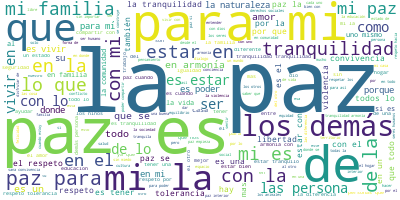

In [101]:
wordcloud.to_image()

En esta imagen podemos observar las diferentes palabras que se encuentran en los textos. Aquí podemos observar que hay stopwords como mi, la, en, con, es, los cuales no nos proporcionan información relevante y por tanto se debe eliminar.

In [105]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS


In [106]:
df.head()

,Narrativa,Narrativa_processed
0,"Tranquilidad, Convivencia, Casa, Educación, Co...",tranquilidad convivencia casa educación colect...
1,Tiempo en horas de día de semana y de fin de s...,tiempo en horas de día de semana y de fin de s...
2,"tranquilidad, familia, empleabilidad Toleranci...",tranquilidad familia empleabilidad tolerancia ...
3,"Acción sin daño, integración comunitaria, resp...",acción sin daño integración comunitaria respet...
4,Procesos formativos y de multiplicación. Numer...,procesos formativos y de multiplicación numero...


## Lemmatization

Procederemos a realizar la lematización. Esto consiste en convertir las palabras de la siguiente manera: si hay verbos en pasado o futuro los convierte a presente, si hay palabras en tercera persona las convierte a primera persona. 

Podriamos en este paso realizar el proceso de Stemming (convertir la palabra a su root word). Sin embargo, decidimos no implementarlo puesto que convierte las palabras hasta un punto que no nos genera valor, por ejemplo, "Computer" lo convertiría a "Comput" lo cual no es significativo para nuestro objetivo del proyecto. Por tanto, solo nos quedamos con el proceso de lematización. 

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word.

Text preprocessing includes both Stemming as well as Lemmatization. Many times people find these two terms confusing. Some treat these two as same. Actually, lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.

In [114]:
import spacy
nlp = spacy.load('es_core_news_sm')

In [121]:

data_list=[]
#allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
for row in df.Narrativa_processed:
    #d_actual=(' '.join(lemEsp.Sentence(lemEsp.parse(row, lemmata=True)).lemmata))
    token_list=""
    text=nlp(row)
    for token in text:        
        token_list+=token.lemma_+" " 
    data_list.append(token_list.rstrip())

In [122]:
data_list

['tranquilidad convivencia casar educación colectividad respetar tranquilidad acceso a lo educación lo humanización del espaciar ese siempre ser el caminar',
 'tiempo en hora de día de semana y de fin de semana en el que lo padre / cuidador pasar tiempo con lo hijo en espacio del ie y de lo hijo tiempo en hora de lo hijo en el que pasar tiempo con lo padre y mayor evidenciar de mantener lo familia unir hogar equilibrio hogar mantener los familia unir',
 'tranquilidad familia empleabilidad tolerancia tranquilidad hogar lo paz ser satisfacer lo derecho básico constitucional vivienda alimentación salud educación',
 'acción sin dañar integración comunitario respetar derecho humano hogar compartir tranquilidad lo paz ser el bien común',
 'proceso formativo y de multiplicación numerar de alianza publicar privar numerar de accionar parir lo protección de ddhh tolerancia no violencia derecho social concertación',
 'iniciativo de cultura ciudadano evento de ciudad que promover construcción de p

In [123]:
df_lemmatized=pd.DataFrame(data=data_list,columns=["Narrativa_lemmatized"])

In [124]:
df_lemmatized.head()

,Narrativa_lemmatized
0,tranquilidad convivencia casar educación colec...
1,tiempo en hora de día de semana y de fin de se...
2,tranquilidad familia empleabilidad tolerancia ...
3,acción sin dañar integración comunitario respe...
4,proceso formativo y de multiplicación numerar ...


In [125]:
df.columns

Index(['Narrativa', 'Narrativa_processed'], dtype='object')

In [126]:
df["Narrativa_lemmatized"]= df_lemmatized.values

C:\Users\sami_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [127]:
df.head(100)

,Narrativa,Narrativa_processed,Narrativa_lemmatized
0,"Tranquilidad, Convivencia, Casa, Educación, Co...",tranquilidad convivencia casa educación colect...,tranquilidad convivencia casar educación colec...
1,Tiempo en horas de día de semana y de fin de s...,tiempo en horas de día de semana y de fin de s...,tiempo en hora de día de semana y de fin de se...
2,"tranquilidad, familia, empleabilidad Toleranci...",tranquilidad familia empleabilidad tolerancia ...,tranquilidad familia empleabilidad tolerancia ...
3,"Acción sin daño, integración comunitaria, resp...",acción sin daño integración comunitaria respet...,acción sin dañar integración comunitario respe...
4,Procesos formativos y de multiplicación. Numer...,procesos formativos y de multiplicación numero...,proceso formativo y de multiplicación numerar ...
5,"INICIATIVAS DE CULTURA CIUDADANA, EVENTOS DE C...",iniciativas de cultura ciudadana eventos de ci...,iniciativo de cultura ciudadano evento de ciud...
6,"Comunicación, tolerancia, concertación. Tolera...",comunicación tolerancia concertación toleranci...,comunicación tolerancia concertación toleranci...
7,"Voluntad,comunicación, Reglas Respeto Toleranc...",voluntadcomunicación reglas respeto tolerancia...,voluntadcomunicación reglar respetar toleranci...
8,1. Sensibilidad social respecto temáticas coti...,sensibilidad social respecto temáticas cotidia...,sensibilidad social respectar temático cotidia...
9,"Cambio de percepción comunitaria, fortalecimie...",cambio de percepción comunitaria fortalecimien...,cambiar de percepción comunitario fortalecimie...


## Tokenization

Consiste en convertir las oraciones en tokens (palabras)

In [128]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence)))  # deacc=True removes punctuations

df["Narrativa_lemmatized"] = list(sent_to_words(df["Narrativa_lemmatized"]))

C:\Users\sami_\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


## Bigrams and Trigrams

Consiste en encontrar conjuntos de 2 (bi) o 3 (tri) palabras que formen significado

In [129]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(df['Narrativa_lemmatized'], min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[df['Narrativa_lemmatized']], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

df['Narrativa_lemmatized'] = make_bigrams(df['Narrativa_lemmatized'])
df['Narrativa_lemmatized'] = make_trigrams(df['Narrativa_lemmatized'])

C:\Users\sami_\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\sami_\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [130]:
df.head(100)

,Narrativa,Narrativa_processed,Narrativa_lemmatized
0,"Tranquilidad, Convivencia, Casa, Educación, Co...",tranquilidad convivencia casa educación colect...,"[tranquilidad, convivencia, casar, educación, ..."
1,Tiempo en horas de día de semana y de fin de s...,tiempo en horas de día de semana y de fin de s...,"[tiempo, en, hora, de, día, de, semana, de, fi..."
2,"tranquilidad, familia, empleabilidad Toleranci...",tranquilidad familia empleabilidad tolerancia ...,"[tranquilidad, familia, empleabilidad, toleran..."
3,"Acción sin daño, integración comunitaria, resp...",acción sin daño integración comunitaria respet...,"[acción, sin, dañar, integración, comunitario,..."
4,Procesos formativos y de multiplicación. Numer...,procesos formativos y de multiplicación numero...,"[proceso, formativo, de, multiplicación, numer..."
5,"INICIATIVAS DE CULTURA CIUDADANA, EVENTOS DE C...",iniciativas de cultura ciudadana eventos de ci...,"[iniciativo, de, cultura, ciudadano, evento, d..."
6,"Comunicación, tolerancia, concertación. Tolera...",comunicación tolerancia concertación toleranci...,"[comunicación, tolerancia, concertación, toler..."
7,"Voluntad,comunicación, Reglas Respeto Toleranc...",voluntadcomunicación reglas respeto tolerancia...,"[reglar, respetar, tolerancia, hogar, estar, d..."
8,1. Sensibilidad social respecto temáticas coti...,sensibilidad social respecto temáticas cotidia...,"[sensibilidad, social, respectar, temático, co..."
9,"Cambio de percepción comunitaria, fortalecimie...",cambio de percepción comunitaria fortalecimien...,"[cambiar, de, percepción, comunitario, fortale..."


## Remove Stop words

Se quitan las palabras que son conocidas como "Stop words": lo, la, con, antes, sin, de

In [131]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sami_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sami_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [132]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('spanish')


In [133]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [134]:
df['Narrativa_lemmatized'] = remove_stopwords(df['Narrativa_lemmatized'])

C:\Users\sami_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [135]:
df.head(100)

,Narrativa,Narrativa_processed,Narrativa_lemmatized
0,"Tranquilidad, Convivencia, Casa, Educación, Co...",tranquilidad convivencia casa educación colect...,"[tranquilidad, convivencia, casar, educación, ..."
1,Tiempo en horas de día de semana y de fin de s...,tiempo en horas de día de semana y de fin de s...,"[tiempo, hora, día, semana, fin, semana, padre..."
2,"tranquilidad, familia, empleabilidad Toleranci...",tranquilidad familia empleabilidad tolerancia ...,"[tranquilidad, familia, empleabilidad, toleran..."
3,"Acción sin daño, integración comunitaria, resp...",acción sin daño integración comunitaria respet...,"[acción, dañar, integración, comunitario, resp..."
4,Procesos formativos y de multiplicación. Numer...,procesos formativos y de multiplicación numero...,"[proceso, formativo, multiplicación, numerar, ..."
5,"INICIATIVAS DE CULTURA CIUDADANA, EVENTOS DE C...",iniciativas de cultura ciudadana eventos de ci...,"[iniciativo, cultura, ciudadano, evento, ciuda..."
6,"Comunicación, tolerancia, concertación. Tolera...",comunicación tolerancia concertación toleranci...,"[comunicación, tolerancia, concertación, toler..."
7,"Voluntad,comunicación, Reglas Respeto Toleranc...",voluntadcomunicación reglas respeto tolerancia...,"[reglar, respetar, tolerancia, hogar, tranquil..."
8,1. Sensibilidad social respecto temáticas coti...,sensibilidad social respecto temáticas cotidia...,"[sensibilidad, social, respectar, temático, co..."
9,"Cambio de percepción comunitaria, fortalecimie...",cambio de percepción comunitaria fortalecimien...,"[cambiar, percepción, comunitario, fortalecimi..."


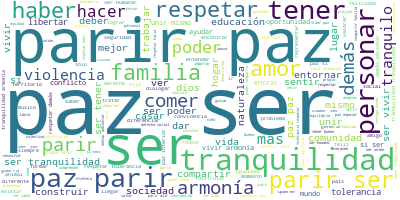

In [138]:
# Join the different processed titles together.
long_string= ""
for text in df['Narrativa_lemmatized']:
    for token in text:
        long_string += token + ","
    
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## LDA (latent Dirichlet Allocation)

Document-word matrix

In [145]:
# Join the different processed titles together.
data_lemmatized= []
for text in df['Narrativa_lemmatized']:
    for token in text:
        data_lemmatized.append(token)

data_lemmatized[:20]

['tranquilidad',
 'convivencia',
 'casar',
 'educación',
 'colectividad',
 'respetar',
 'tranquilidad',
 'acceso',
 'educación',
 'humanización',
 'espaciar',
 'siempre',
 'ser',
 'caminar',
 'tiempo',
 'hora',
 'día',
 'semana',
 'fin',
 'semana']

In [146]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             token_pattern='[a-zA-Z]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(data_lemmatized)

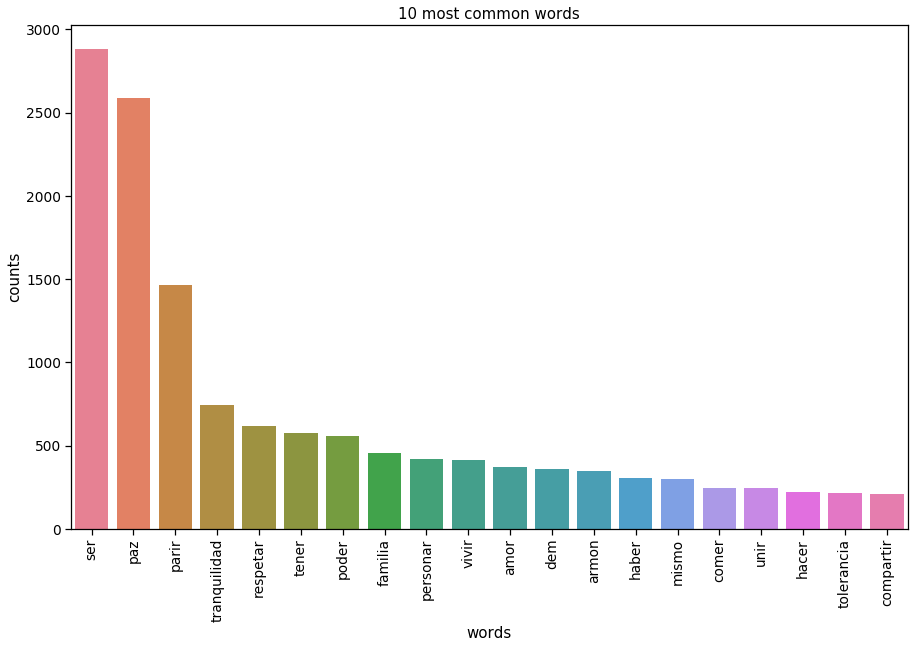

In [149]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Visualise the 10 most common words
plot_10_most_common_words(data_vectorized, vectorizer)

Construcción del modelo

In [151]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=10,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [153]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

number_words = 10

print_topics(lda_model,vectorizer,number_words)


Topic #0:
tener unir ver casar naturaleza dar dios oportunidad mejor generar

Topic #1:
bueno violencia sico librar feliz siempre opini comprender ejemplo traer

Topic #2:
personar vida mas deber empezar conflicto educaci pensar barrio formar

Topic #3:
vivir armon tranquilo asir diferenciar disfrutar hacia valorar coser ambientar

Topic #4:
ser amor mismo libertar llegar interior rodear mico confianza espiritual

Topic #5:
parir tolerancia social sentir saber ayudar uni problema vecino pasar

Topic #6:
familia dem hacer compartir construir cada hogar mundo hijo igualdad

Topic #7:
respetar convivencia bien lugar trabajar decir miedo gente jimo padre

Topic #8:
paz comer entornar animal representar querer importante aprender ciudad conseguir

Topic #9:
tranquilidad poder haber comunidad entrar derecho sociedad amigo encontrar amar


In [161]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne', sort_topics= False)
panel

C:\Users\sami_\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


Wall time: 52.6 s


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0     -192.540405  136.062775       1        1  10.198358
1       34.460938  107.919731       2        1   8.766735
2      210.667145  188.474045       3        1  10.077006
3      288.724792  -16.514465       4        1   9.138062
4      -22.501900  288.920044       5        1  12.105325
5      171.840179 -241.803680       6        1   9.920422
6      -81.655571  -36.756508       7        1  10.328099
7      101.737656  -64.937950       8        1   8.548636
8      -54.752544 -238.055756       9        1  11.258095
9     -258.615570  -99.387825      10        1   9.659262, topic_info=    Category         Freq             Term        Total  loglift  logprob
397  Default  2476.000000              ser  2476.000000  30.0000  30.0000
326  Default  2298.000000              paz  2298.000000  29.0000  29.0000
321  Default  1498.000000            parir  1498.000000  28.0000  28.0000
376  Default   687.000000         respetar   687.000000  27.0000  27.0000
441  Default   674.000000     tranquilidad   674.000000  26.0000  26.0000
338  Default   613.000000            poder   613.000000  25.0000  25.0000
425  Default   560.000000            tener   560.000000  24.0000  24.0000
465  Default   445.000000            vivir   445.000000  23.0000  23.0000
186  Default   420.000000          familia   420.000000  22.0000  22.0000
334  Default   415.000000         personar   415.000000  21.0000  21.0000
42   Default   351.000000            armon   351.000000  20.0000  20.0000
131  Default   356.000000              dem   356.000000  19.0000  19.0000
212  Default   337.000000            haber   337.000000  18.0000  18.0000
32   Default   292.000000             amor   292.000000  17.0000  17.0000
450  Default   243.000000             unir   243.000000  16.0000  16.0000
285  Default   263.000000            mismo   263.000000  15.0000  15.0000
443  Default   215.000000        tranquilo   215.000000  14.0000  14.0000
215  Default   221.000000            hacer   221.000000  13.0000  13.0000
60   Default   205.000000            bueno   205.000000  12.0000  12.0000
83   Default   222.000000            comer   222.000000  11.0000  11.0000
462  Default   187.000000        violencia   187.000000  10.0000  10.0000
86   Default   194.000000        compartir   194.000000   9.0000   9.0000
110  Default   172.000000      convivencia   172.000000   8.0000   8.0000
433  Default   183.000000       tolerancia   183.000000   7.0000   7.0000
56   Default   163.000000             bien   163.000000   6.0000   6.0000
91   Default   171.000000        comunidad   171.000000   5.0000   5.0000
166  Default   166.000000           entrar   166.000000   4.0000   4.0000
461  Default   168.000000             vida   168.000000   3.0000   3.0000
411  Default   160.000000           social   160.000000   2.0000   2.0000
45   Default   148.000000             asir   148.000000   1.0000   1.0000
..       ...          ...              ...          ...      ...      ...
29   Topic10    97.620297            amigo    98.521073   2.3281  -3.3840
160  Topic10    81.391150        encontrar    82.291925   2.3262  -3.5658
27   Topic10    60.229222             amar    61.129998   2.3224  -3.8670
122  Topic10    56.906790          cultura    57.807565   2.3215  -3.9237
6    Topic10    48.040546          aceptar    48.941322   2.3187  -4.0931
121  Topic10    43.239812           cuidar    44.140587   2.3166  -4.1983
120  Topic10    42.422151       cualquiera    43.322927   2.3162  -4.2174
57   Topic10    34.011220        bienestar    34.911995   2.3111  -4.4384
374  Topic10    33.954610        respectar    34.855386   2.3111  -4.4401
124  Topic10    26.894175          cumplir    27.794950   2.3043  -4.6732
363  Topic10    21.253268        reconocer    22.154044   2.2957  -4.9086
398  Topic10    19.492589        serenidad    20.393365   2.2921  -4.9951
191  

Bag of Words

In [195]:
data = df["Narrativa_lemmatized"].values.tolist()
data[0:5]

[['tranquilidad',
  'convivencia',
  'casar',
  'educación',
  'colectividad',
  'respetar',
  'tranquilidad',
  'acceso',
  'educación',
  'humanización',
  'espaciar',
  'siempre',
  'ser',
  'caminar'],
 ['tiempo',
  'hora',
  'día',
  'semana',
  'fin',
  'semana',
  'padre',
  'cuidador',
  'pasar',
  'tiempo',
  'hijo',
  'espacio',
  'ie',
  'hijo',
  'tiempo',
  'hora',
  'hijo',
  'pasar',
  'tiempo',
  'padre',
  'mayor',
  'evidenciar',
  'mantener',
  'familia',
  'unir',
  'hogar',
  'equilibrio',
  'hogar',
  'mantener',
  'familia',
  'unir'],
 ['tranquilidad',
  'familia',
  'empleabilidad',
  'tolerancia',
  'tranquilidad',
  'hogar',
  'paz',
  'ser',
  'satisfacer',
  'derecho',
  'básico',
  'constitucional',
  'vivienda',
  'alimentación',
  'salud',
  'educación'],
 ['acción',
  'dañar',
  'integración',
  'comunitario',
  'respetar',
  'derecho',
  'humano',
  'hogar',
  'compartir',
  'tranquilidad',
  'paz',
  'ser',
  'bien',
  'común'],
 ['proceso',
  'format

In [196]:
dictionary = gensim.corpora.Dictionary(data)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 acceso
1 caminar
2 casar
3 colectividad
4 convivencia
5 educación
6 espaciar
7 humanización
8 respetar
9 ser
10 siempre


In [197]:
len(dictionary)

2209

Filter out tokens that appear in
less than 15 documents (absolute number) or
more than 0.5 documents (fraction of total corpus size, not absolute number).
after the above two steps, keep only the first 100000 most frequent tokens.

In [198]:
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=2000)

In [199]:
bow_corpus = [dictionary.doc2bow(doc) for doc in data]
bow_corpus[1000]

[(6, 3),
 (38, 1),
 (43, 1),
 (58, 1),
 (269, 1),
 (273, 1),
 (330, 1),
 (351, 1),
 (353, 1),
 (373, 1),
 (437, 1),
 (446, 1),
 (447, 1),
 (448, 1),
 (449, 1),
 (450, 1),
 (451, 1)]

In [200]:
bow_doc_1000 = bow_corpus[1000]
for i in range(len(bow_doc_1000)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_1000[i][0], 
                                               dictionary[bow_doc_1000[i][0]], 
bow_doc_1000[i][1]))

Word 6 ("respetar") appears 3 time.
Word 38 ("parir") appears 1 time.
Word 43 ("ciudad") appears 1 time.
Word 58 ("demás") appears 1 time.
Word 269 ("habitante") appears 1 time.
Word 273 ("físico") appears 1 time.
Word 330 ("fomentar") appears 1 time.
Word 351 ("integridad") appears 1 time.
Word 353 ("naturaleza") appears 1 time.
Word 373 ("colaboración") appears 1 time.
Word 437 ("animal") appears 1 time.
Word 446 ("cero") appears 1 time.
Word 447 ("corrupción") appears 1 time.
Word 448 ("deportar") appears 1 time.
Word 449 ("material") appears 1 time.
Word 450 ("modo") appears 1 time.
Word 451 ("máximo") appears 1 time.


TF-IDF

In [201]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.3879495950102895),
 (1, 0.3755370577876941),
 (2, 0.24594172925634347),
 (3, 0.23671362364125753),
 (4, 0.5207858193422347),
 (5, 0.3727114308502359),
 (6, 0.1420033457222307),
 (7, 0.32884885204807995),
 (8, 0.23131830482799817)]


In [202]:
len(dictionary)

808

In [203]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [204]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.061*"parir" + 0.037*"tranquilidad" + 0.036*"tener" + 0.030*"poder" + 0.027*"vivir" + 0.026*"respetar" + 0.018*"mismo" + 0.017*"haber" + 0.017*"demás" + 0.015*"familia"
Topic: 1 
Words: 0.063*"familia" + 0.041*"libertar" + 0.038*"parir" + 0.031*"tranquilidad" + 0.024*"casar" + 0.023*"poder" + 0.018*"bien" + 0.017*"músico" + 0.015*"sentir" + 0.012*"ambientar"
Topic: 2 
Words: 0.039*"demás" + 0.033*"respetar" + 0.030*"convivencia" + 0.023*"tolerancia" + 0.022*"social" + 0.022*"unir" + 0.018*"tener" + 0.016*"parir" + 0.015*"equidad" + 0.014*"oportunidad"
Topic: 3 
Words: 0.037*"parir" + 0.032*"tranquilidad" + 0.027*"haber" + 0.021*"si" + 0.021*"perdonar" + 0.019*"tener" + 0.017*"comer" + 0.014*"amor" + 0.014*"asir" + 0.013*"ir"
Topic: 4 
Words: 0.047*"parir" + 0.033*"respetar" + 0.021*"tener" + 0.019*"poder" + 0.018*"mismo" + 0.018*"vivir" + 0.017*"demás" + 0.016*"personar" + 0.014*"violencia" + 0.013*"armonía"
Topic: 5 
Words: 0.095*"parir" + 0.025*"poder" + 0.022*"hace